# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
# Librarías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras import preprocessing
from keras import backend as K
from livelossplot import PlotLossesKeras

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

# con 10 mín  fotos se generan 158 categorías
# con 40 mín  fotos se generan 19 categorías
# con 50 mín  fotos se generan 12 categorías

In [3]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (62, 47)


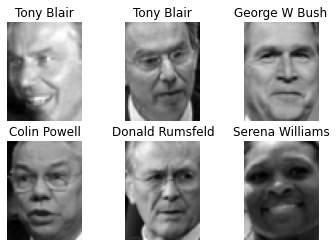

In [5]:
# Some examples
for i in range(6):
  img=X[i,:]
  img=img.reshape(W,H)
  plt.subplot(2,3,i+1)
  plt.title(target_names[y[i]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()

### MODELO 4 - SVM SUPPORT VECTOR MACHINE


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_lfw_pairs
from matplotlib import pyplot as plt
from sklearn import svm
from PIL import Image
import numpy as np
import random

import tensorflow_datasets as tfds
import tensorflow as tf
tf.test.gpu_device_name()

''

In [8]:
# Shuffling the data

temp=list(zip(X,y)) 
random.shuffle(temp) 
X,y=zip(*temp)

X=np.array(X)
y=np.array(y)

In [9]:
# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,y,test_size=0.20,random_state=42)

In [10]:
# Linear SVM

svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)

print(svm_linear.score(testing_data_X,testing_data_Y)*100)

80.4812834224599


In [11]:
# RBF SVM

svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)

print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

75.93582887700535


In [12]:
# Quadratic SVM

svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)

print(svm_quad.score(testing_data_X,testing_data_Y)*100)

79.41176470588235


In [14]:
# Classification Report

print("Linear SVM")
y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("RBF SVM")
y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

print("Quadratic SVM")
y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_names))

Linear SVM
                           precision    recall  f1-score   support

             Ariel Sharon       0.69      0.69      0.69        16
    Arnold Schwarzenegger       0.55      0.75      0.63         8
             Colin Powell       0.76      0.79      0.77        47
          Donald Rumsfeld       0.75      0.83      0.79        29
            George W Bush       0.87      0.89      0.88       123
        Gerhard Schroeder       0.74      0.89      0.81        19
  Gloria Macapagal Arroyo       0.89      0.89      0.89         9
              Hugo Chavez       0.87      0.68      0.76        19
           Jacques Chirac       0.50      0.75      0.60         4
            Jean Chretien       1.00      0.73      0.84        11
        Jennifer Capriati       0.67      0.50      0.57         8
            John Ashcroft       0.57      0.57      0.57         7
        Junichiro Koizumi       0.92      0.80      0.86        15
               Laura Bush       0.83      0.83    

Linear SVM


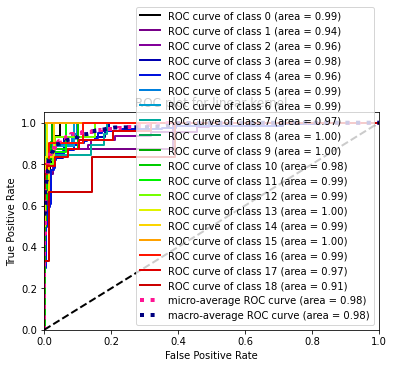

RBF SVM


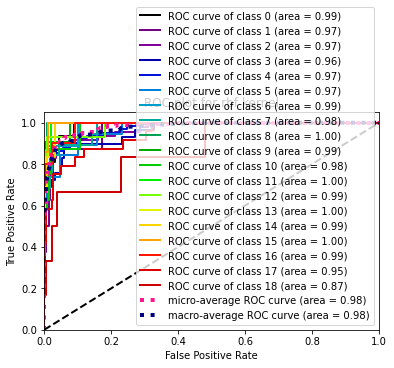

Quadratic SVM


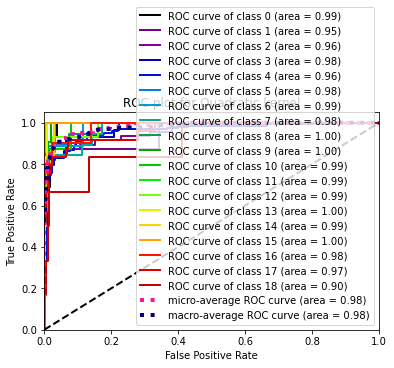

In [15]:
# ROC Curve

#!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

print("Linear SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

print("RBF SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

print("Quadratic SVM")
skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

### BIBLIOGRAFÍA

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

https://github.com/harshitrai17152/Labeled-Faces-in-the-Wild.git
    